<a href="https://colab.research.google.com/github/marcosvnespolo/Portifolio/blob/main/An%C3%A1lise_Explorat%C3%B3ria_(Netflix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview do Projeto

Através da base de dados a seguir, importada do site kaggle, realizarei a análise exploratória dos dados com o objetivo de identificar padrões e retirar insights que seriam relevantes para uma organização como a Netflix.


In [ ]:
import pandas as pd
import datetime as dt

Vizualizando a Base de Dados


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Análise Exploratória/netflix daily top 10.csv')
display(df)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [ ]:
base.shape

(7100, 10)

 Averiguando o período das análises

In [ ]:
data_inicial = pd.to_datetime(df['As of']).dt.date.min()
print(data_inicial)

2020-04-01


In [ ]:
data_final = pd.to_datetime(df['As of']).dt.date.max()
print(data_final)

2022-03-11


Verificar os tipos de dados disponíveis e a presença de valores nulos

In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

Verificando o tipo dos dados


In [ ]:
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

Nota-se que a coluna 'Netflix Exclusive' possui diversos valores nulos, sendo interessante analisar mais profundamente esta coluna especificamente.


In [ ]:
df['Netflix Exclusive'].value_counts()

Yes    4599
Name: Netflix Exclusive, dtype: int64

Neste ponto, já podemos analisar de maneira mais aprofundada as informações iestatísticas da nossa base de dados.

Obs: A função .describe( retornará apenas as estatísticas das colunas que possuem valores inteiros.


In [ ]:
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


Uma visualização gráfica nos ajudará a entender melhor nossos dados, neste caso, utilizarei um boxplot

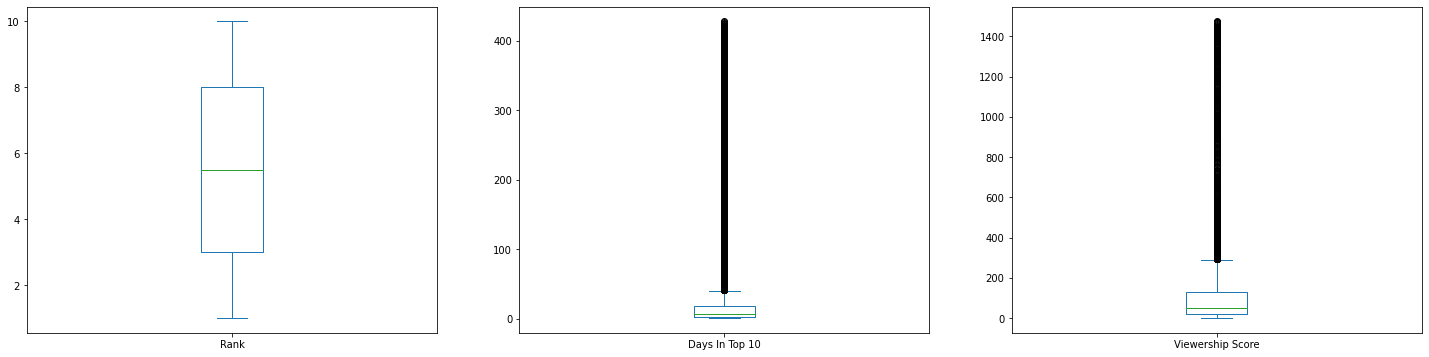

In [ ]:
boxplot = df.plot(kind='box', figsize=(25,6), subplots=True)

Através da análise gráfica é possuvel inferir a presença de outliers em nossa base de dados.

In [ ]:
df[df['Days In Top 10'] >= 100]


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


O título 'Cocomelon' apareceu muitas vezes no top 10, seria interessante também realizar uma comparação frequência no top 10 com os demais títulos.

*   Também podemos apresentar estes dados de maneira visual para facilitar seu entendimento.




In [ ]:
df.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

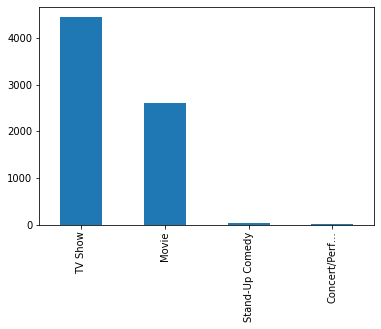

In [ ]:
df.Type.value_counts().plot(kind='bar')

Aparentemente, as séries de TV aparecem com uma frequência considerávelmente maior no top 10, possivelmente por conta de seu regime de lançamento e maior duração.


Por fim, ao consultar a base de dados no site de origem(kaggle), foi possível observar que a coluna 'Viewership Score' é referente à uma pontuação fornecida a cada produção, de acordo com o tempo com que a mesma se mantém no top 10

*   Exemplo: se a produção apreceu em primeiro lugar, receberá um score de 10 pontos, em segundo lugar, 9 pontos, e assim por diante;
*   Com isto, podemos confirmar nossas análises anteriores através desde novo parâmetro com o código abaixo.







In [ ]:
df[df['Viewership Score'] == df['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474


##Conclusões Finais


*   Através desta análise exploratória foi possível concluir que a produção que permaneceu por maior tempo no Top 10 foi a série de TV infantil 'Cocomelon';
*   Assim, podemos observar que muitas vezes a análise de dados pode se contrapor ao senso comum, pois o resultado baseado em dados, pode não ser o esperado de acordo com a observação individual de cada pessoa, tornando assim a análise exploratória indispensável para a tomada de decisão bem direcionada,


